## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
import re

We will be using :
- Regex (re) to extract and manipulate strings based on specific patterns.
- pandas for analysis.
- matlotlib and seaborn for visualization.
- emoji to deal with emojis.
- wordcloud for the most used words.

In [2]:
f=open('WhatsApp Chat with CSE 3C Official 2023-24.txt','r',encoding='utf-8')
data=f.read()

In [3]:
dummy=data.split('\n')
dummy

['9/8/23, 4:28\u202fPM - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.',
 '9/8/23, 12:49\u202fPM - ~\u202fHima😇 created group "CSE 3C 2023-24"',
 "9/8/23, 4:28\u202fPM - You joined using this group's invite link",
 "9/8/23, 4:31\u202fPM - +91 83686 46641 joined using this group's invite link",
 "9/8/23, 4:32\u202fPM - +91 83948 85007 joined using this group's invite link",
 "9/8/23, 4:33\u202fPM - Suraj Class joined using this group's invite link",
 "9/8/23, 4:36\u202fPM - +91 6399 827 470 joined using this group's invite link",
 '9/8/23, 4:37\u202fPM - +91 99906 26616: <Media omitted>',
 '9/8/23, 4:38\u202fPM - +91 99906 26616: Erp registration has to be done timely else fine will be charged',
 '9/8/23, 4:43\u202fPM - +91 83948 85007: Mam How to fill covid declaration form?',
 '9/8/23, 4:43\u202fPM - +91 99906 26616: ask your frnds what they have done',
 '9/8/23, 4:44\u202fPM - +91 83948 8500

## Preprocessing

In [4]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}\s[APap][Mm]\s-\s'
messages = re.split(pattern, data)[1:]
print(len(messages))

395


In [5]:
dates=re.findall(pattern,data)
print(len(dates))

395


In [6]:
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 '~\u202fHima😇 created group "CSE 3C 2023-24"\n',
 "You joined using this group's invite link\n",
 "+91 83686 46641 joined using this group's invite link\n",
 "+91 83948 85007 joined using this group's invite link\n",
 "Suraj Class joined using this group's invite link\n",
 "+91 6399 827 470 joined using this group's invite link\n",
 '+91 99906 26616: <Media omitted>\n',
 '+91 99906 26616: Erp registration has to be done timely else fine will be charged\n',
 '+91 83948 85007: Mam How to fill covid declaration form?\n',
 '+91 99906 26616: ask your frnds what they have done\n',
 '+91 83948 85007: okey mam\n',
 "+91 88109 77275 joined using this group's invite link\n",
 "+91 82184 04540 joined using this group's invite link\n",
 "+91 89233 21602 joined using this group's invite link\n",
 "+91 6387 327 791 joined using this group's invite link\n"

In [7]:
string= "10/16/23, 10:11\u202fPM - "
string = string.split(',')
date, time = string[0], string[1]
time=time.split('-')
time=time[0].strip()
print(date+" and "+time)

10/16/23 and 10:11 PM


In [8]:
def gettimeanddate(string):
     string = string.split(',')
     date, time = string[0], string[1]
     time=time.split('-')
     time=time[0].strip()

     return date+" "+time

In [9]:
df = pd.DataFrame({'user_message':messages, 'message_date': dates})
df['message_date'] = df['message_date'].apply(lambda text: gettimeanddate(text))
df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,9/8/23 4:28 PM
1,"~ Hima😇 created group ""CSE 3C 2023-24""\n",9/8/23 12:49 PM
2,You joined using this group's invite link\n,9/8/23 4:28 PM
3,+91 83686 46641 joined using this group's invi...,9/8/23 4:31 PM
4,+91 83948 85007 joined using this group's invi...,9/8/23 4:32 PM


In [10]:
df['user_message']

0      Messages and calls are end-to-end encrypted. N...
1               ~ Hima😇 created group "CSE 3C 2023-24"\n
2            You joined using this group's invite link\n
3      +91 83686 46641 joined using this group's invi...
4      +91 83948 85007 joined using this group's invi...
                             ...                        
390                   +91 99906 26616: <Media omitted>\n
391    +91 99906 26616: It is suggested to all the st...
392                   +91 99906 26616: <Media omitted>\n
393            +91 99906 26616: Yellow is your sitting\n
394    +91 99906 26616: Make sure you all are sitting...
Name: user_message, Length: 395, dtype: object

In [11]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('whatsapp notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages

def getstring(text):
    return text.split('\n')[0]

df['message']=df['message'].apply(lambda text:getstring(text))

df.drop(['user_message'],axis=1)
df=df[['message','date','user']]

df=df.rename(columns={'message':'Message','date':'Date','user':'User'})
df.head()

,Message,Date,User
0,Messages and calls are end-to-end encrypted. N...,9/8/23 4:28 PM,whatsapp notification
1,"~ Hima😇 created group ""CSE 3C 2023-24""",9/8/23 12:49 PM,whatsapp notification
2,You joined using this group's invite link,9/8/23 4:28 PM,whatsapp notification
3,+91 83686 46641 joined using this group's invi...,9/8/23 4:31 PM,whatsapp notification
4,+91 83948 85007 joined using this group's invi...,9/8/23 4:32 PM,whatsapp notification


In [12]:
df.shape

(395, 3)

In [13]:
df['Only date'] = pd.to_datetime(df['Date']).dt.date
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month_num'] = pd.to_datetime(df['Date']).dt.month
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Day_name'] = pd.to_datetime(df['Date']).dt.day_name()
df['Hour'] = pd.to_datetime(df['Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Date']).dt.minute

df.head()

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,9/8/23 4:28 PM,whatsapp notification,2023-09-08,2023,9,September,8,Friday,16,28
1,"~ Hima😇 created group ""CSE 3C 2023-24""",9/8/23 12:49 PM,whatsapp notification,2023-09-08,2023,9,September,8,Friday,12,49
2,You joined using this group's invite link,9/8/23 4:28 PM,whatsapp notification,2023-09-08,2023,9,September,8,Friday,16,28
3,+91 83686 46641 joined using this group's invi...,9/8/23 4:31 PM,whatsapp notification,2023-09-08,2023,9,September,8,Friday,16,31
4,+91 83948 85007 joined using this group's invi...,9/8/23 4:32 PM,whatsapp notification,2023-09-08,2023,9,September,8,Friday,16,32


In [14]:
df.columns

Index(['Message', 'Date', 'User', 'Only date', 'Year', 'Month_num', 'Month',
       'Day', 'Day_name', 'Hour', 'Minute'],
      dtype='object')

In [15]:
df[df['User']=='Seema Mam']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
155,<Media omitted>,9/25/23 11:18 AM,Seema Mam,2023-09-25,2023,9,September,25,Monday,11,18
292,"Submit Experiment 1,2,3 solution in Web Design...",10/9/23 4:32 PM,Seema Mam,2023-10-09,2023,10,October,9,Monday,16,32
339,,10/16/23 10:11 PM,Seema Mam,2023-10-16,2023,10,October,16,Monday,22,11
340,link for MOOC course in Web Designing Workshop,10/16/23 10:11 PM,Seema Mam,2023-10-16,2023,10,October,16,Monday,22,11
382,<Media omitted>,10/28/23 11:46 PM,Seema Mam,2023-10-28,2023,10,October,28,Saturday,23,46


In [16]:
words = []
for message in df['Message']:
    words.extend(message.split())
    
print(len(words))

2289


In [17]:
df[df['Message']=='<Media omitted>']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
7,<Media omitted>,9/8/23 4:37 PM,+91 99906 26616,2023-09-08,2023,9,September,8,Friday,16,37
27,<Media omitted>,9/8/23 5:51 PM,+91 99906 26616,2023-09-08,2023,9,September,8,Friday,17,51
56,<Media omitted>,9/9/23 4:33 PM,+91 99906 26616,2023-09-09,2023,9,September,9,Saturday,16,33
65,<Media omitted>,9/11/23 12:34 PM,Sarthak,2023-09-11,2023,9,September,11,Monday,12,34
71,<Media omitted>,9/14/23 1:23 PM,+91 80577 53055,2023-09-14,2023,9,September,14,Thursday,13,23
...,...,...,...,...,...,...,...,...,...,...,...
372,<Media omitted>,10/26/23 8:17 AM,+91 99906 26616,2023-10-26,2023,10,October,26,Thursday,8,17
378,<Media omitted>,10/27/23 3:18 PM,+91 99906 26616,2023-10-27,2023,10,October,27,Friday,15,18
382,<Media omitted>,10/28/23 11:46 PM,Seema Mam,2023-10-28,2023,10,October,28,Saturday,23,46
390,<Media omitted>,10/31/23 9:15 AM,+91 99906 26616,2023-10-31,2023,10,October,31,Tuesday,9,15


In [18]:
df[df['User']=='whatsapp notification']

,Message,Date,User,Only date,Year,Month_num,Month,Day,Day_name,Hour,Minute
0,Messages and calls are end-to-end encrypted. N...,9/8/23 4:28 PM,whatsapp notification,2023-09-08,2023,9,September,8,Friday,16,28
1,"~ Hima😇 created group ""CSE 3C 2023-24""",9/8/23 12:49 PM,whatsapp notification,2023-09-08,2023,9,September,8,Friday,12,49
2,You joined using this group's invite link,9/8/23 4:28 PM,whatsapp notification,2023-09-08,2023,9,September,8,Friday,16,28
3,+91 83686 46641 joined using this group's invi...,9/8/23 4:31 PM,whatsapp notification,2023-09-08,2023,9,September,8,Friday,16,31
4,+91 83948 85007 joined using this group's invi...,9/8/23 4:32 PM,whatsapp notification,2023-09-08,2023,9,September,8,Friday,16,32
...,...,...,...,...,...,...,...,...,...,...,...
210,~ SK Singh🥀 changed this group's icon,10/1/23 10:10 PM,whatsapp notification,2023-10-01,2023,10,October,1,Sunday,22,10
269,+91 98112 10366 joined using this group's invi...,10/6/23 7:58 PM,whatsapp notification,2023-10-06,2023,10,October,6,Friday,19,58
302,~ Hima😇 added +91 96505 34400,10/11/23 1:44 PM,whatsapp notification,2023-10-11,2023,10,October,11,Wednesday,13,44
314,~ Hima😇 added +91 70172 54688,10/14/23 2:32 PM,whatsapp notification,2023-10-14,2023,10,October,14,Saturday,14,32


## Functions

In [19]:
def fetch_stats(selected_user, df):

    if (selected_user != "Overall"):
        df = df[df['user'] == selected_user]

    # fetch the number of msgs
    num_messages = df.shape[0]

    # fetch the number of words
    words = []
    for message in df['Message']:
        words.extend(message.split())

    # fetch the number of media msgs
    num_media_msgs = df[df['Message'] == '<Media omitted>']

    # fetch the number of linls shared
    links = []
    for message in df['Message']:
        links.extend(extract.find_urls(message))

    return num_messages,len(words), num_media_msgs.shape[0], len(links)


In [20]:
def most_active_users(df):
    x = df['User'].value_counts().head()
    df = round((df['User'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(columns={'index': 'name', 'User': 'percent'})
    return x, df


In [21]:
def create_wordcloud(selected_user, df):

    f = open('stop_hinglish.txt', 'r')
    stop_words = f.read()

    if (selected_user != "Overall"):
        df = df[df['User'] == selected_user]

    temp = df[df['User'] != 'whatsapp notification']
    temp = temp[temp['Message'] != '<Media omitted>\n']
    temp = temp[temp['Message'] != 'This message was deleted\n']

    words = []

    for message in temp['Message']:
        for word in message.lower().split():
            if word not in stop_words:
                words.append(word)

    words = pd.DataFrame(words, columns=['words'])
    wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
    df_wc = wc.generate(words['words'].str.cat(sep=" "))
    return df_wc

In [22]:
def most_common_words(selected_user, df):

    f = open('stop_hinglish.txt', 'r')
    stop_words = f.read()

    if (selected_user != "Overall"):
        df = df[df['User'] == selected_user]

    temp = df[df['User'] != 'whatsapp notification']
    temp = temp[temp['Message'] != '<Media omitted>\n']
    temp = temp[temp['Message'] != 'This message was deleted\n']

    words = []

    for message in temp['Message']:
        for word in message.lower().split():
            if word not in stop_words:
                words.append(word)

    pure_words = []
    for message in words:
        pure_words.extend([c for c in message if c in emoji.demojize(message)])

    most_common_df = pd.DataFrame(Counter(words).most_common(20))
    return most_common_df

In [23]:
def emoji_stats(selected_user, df):
    if (selected_user != "Overall"):
        df = df[df['User'] == selected_user]

    emojis = []
    for message in df['Message']:
        emojis.extend([c for c in message if c not in emoji.demojize(message)])

    emoji_df = pd.DataFrame(Counter(emojis).most_common((len(Counter(emojis)))))
    return emoji_df

In [24]:
def monthly_timeline(selected_user, df):
    if (selected_user != "Overall"):
        df = df[df['User'] == selected_user]

    timeline = df.groupby(['Year', 'Month_num', 'Month']).count()['Message'].reset_index()

    time = []
    for i in range(timeline.shape[0]):
        time.append(timeline['Month'][i] + "-" + str(timeline['Year'][i]))

    timeline['Time'] = time

    return timeline

def daily_timeline(selected_user, df):
    if (selected_user != "Overall"):
        df = df[df['User'] == selected_user]

    daily_timeline = df.groupby('Only_date').count()['Message'].reset_index()

    return daily_timeline

def week_activity_map(selected_user, df):
    if (selected_user != "Overall"):
        df = df[df['User'] == selected_user]

    return df['Day_name'].value_counts()

def month_activity_map(selected_user, df):
    if (selected_user != "Overall"):
        df = df[df['User'] == selected_user]

    return df['Month'].value_counts()

def activity_heatmap(selected_user, df):
    if (selected_user != "Overall"):
        df = df[df['User'] == selected_user]

    user_heatmap = df.pivot_table(index='Day_name', values='Message', aggfunc='count').fillna(0)

    return user_heatmap

### Top 10 most active users

In [27]:
df2 = df.copy()    
df2 = df2[df2.User != "group_notification"]
top10df = df2.groupby("User")["Message"].count().sort_values(ascending=False)

# Final Data Frame
top10df = top10df.head(10).reset_index()
top10df

,User,Message
0,+91 99906 26616,139
1,whatsapp notification,68
2,Vishesh Class,22
3,+91 80577 53055,20
4,+91 81260 70820,19
5,+91 84398 25711,10
6,+91 88266 26703,9
7,Kapil Sir Electrical,9
8,+91 94127 03513,8
9,+91 98114 10032,7


In [28]:
# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [31]:
top10df['initials'] = ''
for i in range(10):
    top10df.initials[i] = top10df.User[i].split()[0][0] + top10df.User[i].split()[1][0]
    
top10df.initials[7] = "Me"    # That's me
top10df.initials[8] = "DT"

C:\Users\Sarthak Aggarwal\AppData\Local\Temp\ipykernel_1872\1411663512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10df.initials[i] = top10df.User[i].split()[0][0] + top10df.User[i].split()[1][0]
C:\Users\Sarthak Aggarwal\AppData\Local\Temp\ipykernel_1872\1411663512.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10df.initials[7] = "Me"    # That's me
C:\Users\Sarthak Aggarwal\AppData\Local\Temp\ipykernel_1872\1411663512.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

# Visualisation

### Plotting a simple line graph.

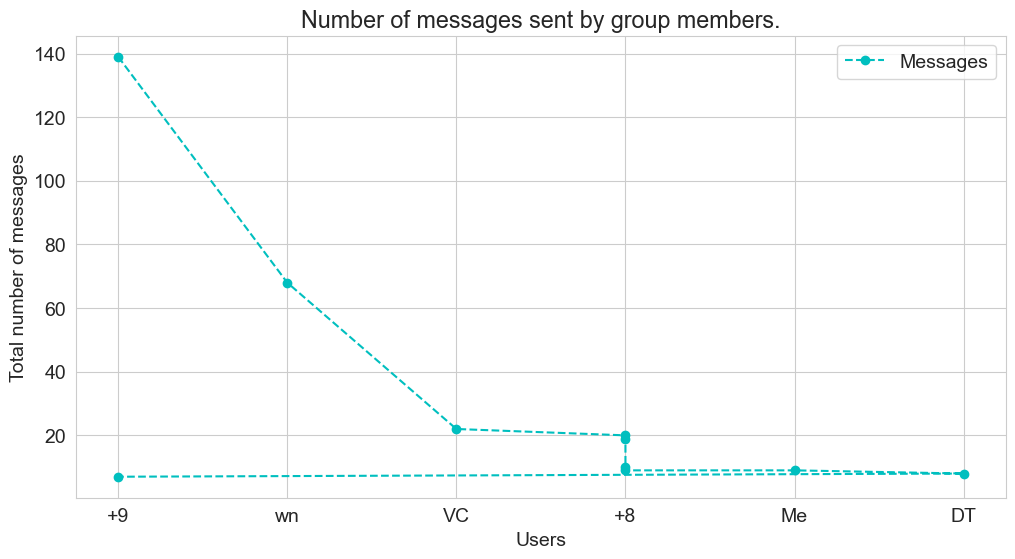

In [33]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

plt.plot(top10df.initials, top10df.Message, 'o--c')  

plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("Number of messages sent by group members.")
plt.legend(['Messages'])

### Plotting a bar chart and line graph together.

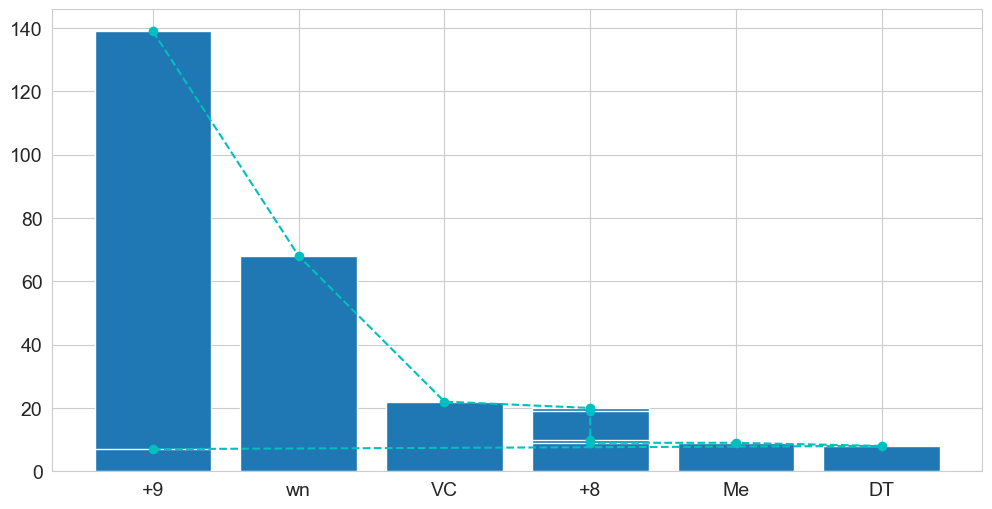

In [35]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

plt.bar(top10df.initials, top10df.Message) 
plt.plot(top10df.initials, top10df.Message, 'o--c');  